<a href="https://colab.research.google.com/github/savioramos1/Portfolio_DataScience/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção de Fraude em Cartões de Crédito

Neste projeto iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. No Brasil, segundo a pesquisa da CNDL/SPC Brasil mostra que 59% dos internautas sofreram algum tipo de fraude financeira nos últimos 12 meses, contra 46% em 2019. Isso corresponde a um contingente 16,7 milhões de brasileiros. O estudo estima que o prejuízo decorrente de fraudes financeiras sofridas no universo dos internautas brasileiros chegou a R$ 2,7 bilhões nos últimos 12 meses, incluídos os gastos na busca de reparação do problema.

![Imagem fraude cartao de credito](https://www.foregon.com/blog/wp-content/uploads/2022/05/18tressinaiscartaoclonado-808x455.jpeg)


Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em Data Science.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

#Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O dataset representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como podemos notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as features são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3, . . .,V28]$

[Na página original dos dados](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3, . . .,V28]$


In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

Para facilitar a aquisição dos dados, criei um link com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
# Importar o arquivo
file_path = "https://www.dropbox.com/s/pdyfvw1yv4goo2w/creditcard.csv?dl=1"

# Importar o arquivo para um DataFrame
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

#Análise Exploratória

Observando as cinco primeiras entradas do dataframe é possível tirar algumas conclusões:


*   É possivel notar que a transformação PCA (Análise de Componentes Principais) deixou *features* descaracterizadas (anônimas) e em valores numéricos. Para um melhor entendimento sobre PCA, [clique aqui](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

*   As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.

*   A *feature* `Class` é a variável alvo, onde:
    
    **1** - é uma transação fraudulenta;

    **0** - é uma transação normal.

In [3]:
# Visualizar as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Através do método `describe()`, podemos verificar abaixo o resumo estatístico e constatar que as variáveis que sofreram a Transformação PCA, não possuem uma discrepância aparente, assim como a coluna `Time`.

Entretando, à variável `Amount`, possui um valor médio de 8.34 e mediana igual 22. O desvio padrão é de 250.12 e temos um valor máximo em uma transação de 25.961,16, isso explica o desvio padrão, uma vez que as transações financeiras é composta em sua maioria por quantias menores.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Quanto à qualidade do dataset, este não apresentou nenhum valor ausente ou que demandasse uma etapa de limpeza. Com isso, podemos seguir para próxima etapa.

In [5]:
# Verificar se há valores nulos
df.isnull().sum().max()

0

Como foi informado na descrição dos dados, as entradas relativas à transações fraudulentas correspondam a 0,17% do total. Vamos verificar essa discrepância no gráfico abaixo.

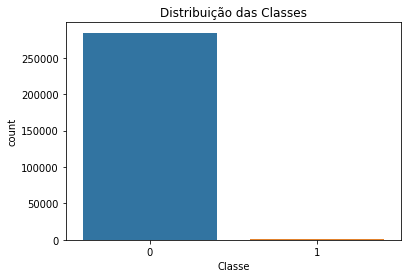

In [6]:
# Plotar gráfico de barras para as Classes
fig , ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax);
ax.set_title('Distribuição das Classes')
ax.set_xlabel('Classe')
plt.show();


Foram plotados dois gráficos com objetivo de comparar as distribuições das 2 classes ao longo do **tempo** (`Time`). No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

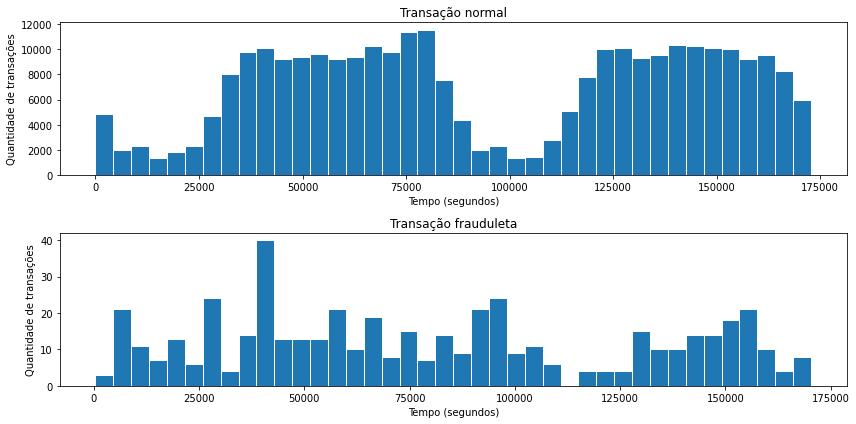

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax[0].hist(df.Time[df.Class == 0], bins=40, edgecolor = 'white')
ax[0].set_title('Transação normal')
ax[0].set_xlabel('Tempo (segundos)')
ax[0].set_ylabel('Quantidade de transações')
plt.tight_layout()

ax[1].hist(df.Time[df.Class == 1], bins=40, edgecolor = 'white')
ax[1].set_title('Transação frauduleta')
ax[1].set_xlabel('Tempo (segundos)')
ax[1].set_ylabel('Quantidade de transações')
plt.tight_layout()



Plotou-se também a variável `Amount` de cada transação para análise.

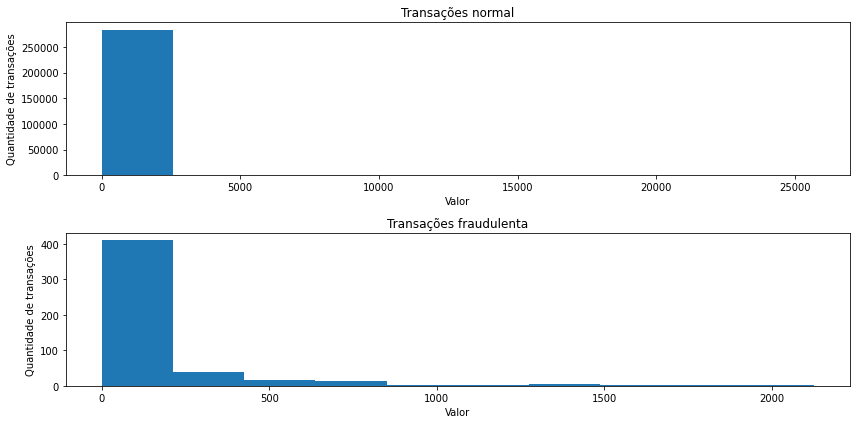

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax[0].hist(df.Amount[df.Class == 0], bins=10)
ax[0].set_title('Transações normal')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Quantidade de transações')
plt.tight_layout()

ax[1].hist(df.Amount[df.Class == 1], bins=10)
ax[1].set_title('Transações fraudulenta')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Quantidade de transações')
plt.tight_layout()

Prosseguindo com análise exploratória, foram plotados também boxplots para averiguar se há alguma diferença no padrão transações em relação à dimensão `Amount`.

Desta forma, podemos notar que há ma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *Machine Learning*. 

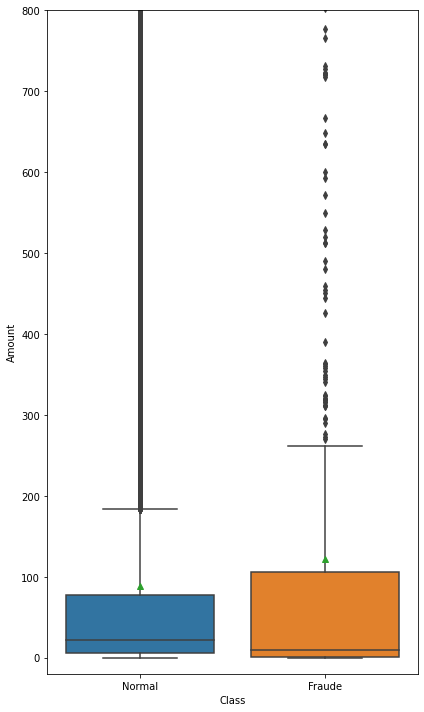

In [9]:
# Plotar Boxplot
fig, ax = plt.subplots(figsize=(6,10), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)

# Definir limites
plt.ylim((-20, 800))
plt.xticks([0, 1], ['Normal', 'Fraude'])

# Exibir Boxplot
plt.tight_layout()

Plotou-se um gráfico de matriz de correlação para determinar a correlação entre as variaveis.

In [10]:
# Criar a variável que recebe a função corr(), que calcula a correlação entre as colunas.
corr = df.corr()

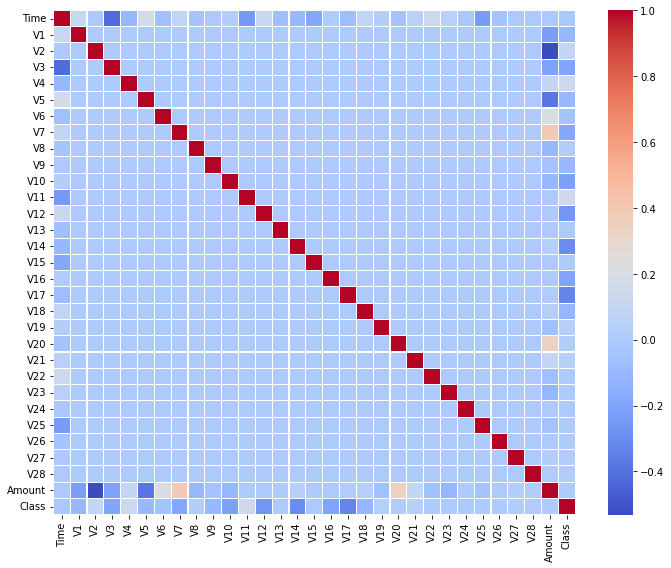

In [11]:
# Plotar gráfico de correlação
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax)
plt.tight_layout()

Nota-se que não há nenhuma correlação forte entre as variáveis.

#Pré-Processamento dos dados

###Padronizar as variáveis `Time` e `Amount`

Nessa etapa, iremos padronizar as colunas `Time` e `Amount` que estão em outra ordem de grandeza. A coluna `Amount` possui *outliers*, com isso, a padronização será feita por meio da classe `StandardScaler`.

In [12]:
# Padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Ver as 5 primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


###Dividir o dataset em treino e teste

Iremos separar o conjunto de dados em treino e teste, com isso poderemos testar o modelo com uma base de dados que ele não teve contato.

In [13]:
# Separar target vector da feature matrix
X = df_clean.drop('Class', axis=1)
y = df['Class']

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

###Balaceamento dos dados

Nesta etapa, iremos balacear os dados, visto que o dataset está bastante desbalanceado. Desse modo, também evitamos o *overfitting* ( é quando o modelo se tornar muito bom em apenas nos dados de treino, para dados novos não apresenta bom desempenho, ou seja, não é capaz de generalizar).
Será utilizado o método *Random Undersampling (RUS)* para o balanceamento dos dados. Esse técnica descarta um subjconjunto aleatório da classe de maior ocorrência, preservando as características da classe de menor ocorrência.



0    369
1    369
Name: Class, dtype: int64


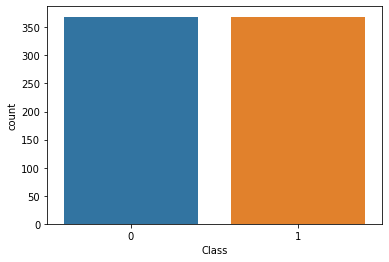

In [14]:
# Técnica de undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_rus);


Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.



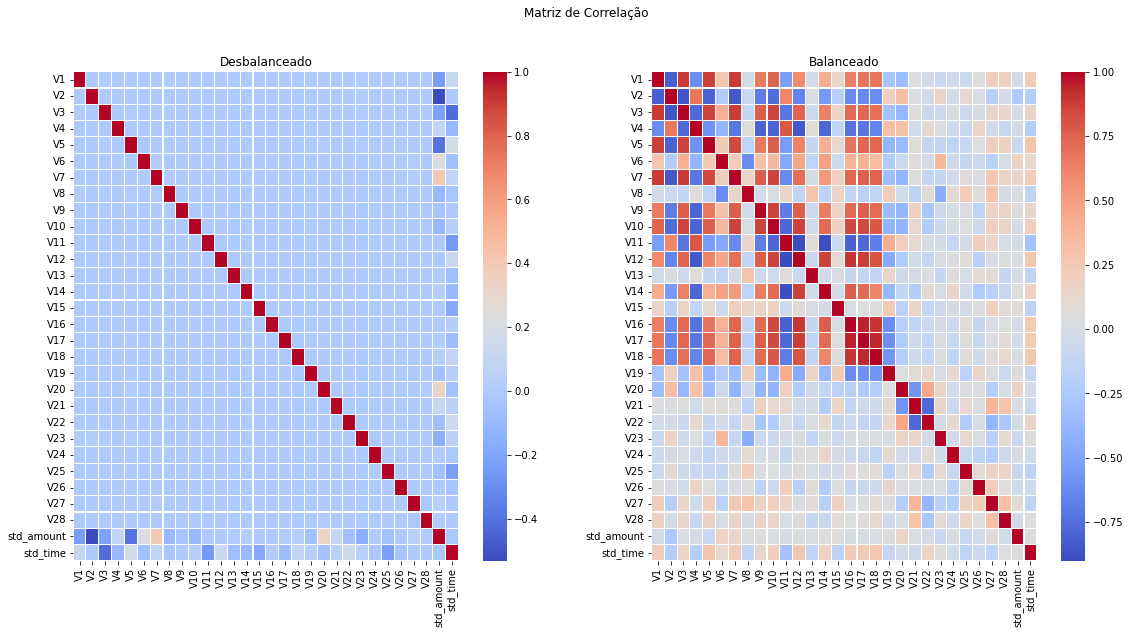

In [15]:
# Plotar matriz de correção
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (19,9))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

#Machine Learning

Com todos os dados preparados e após uma análise exploratória completa, será utilizado dois algoritmos de *Machine Learning*, sendo elas: Regressão Logística e Árvore de Decisão.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.




###Regressão Logística

A Regressão logistica é um algoritmo de aprendizado de máquina que é usado para determinar a probabilidade de um evento acontecer. Esse modelo vai estabelecer a probabilidade de uma transação pertencer a classe 0 ou 1, ou seja, normal ou fraudulenta.

In [16]:
# Instanciar e treinar o modelo de Regressão Logística
model = LogisticRegression(random_state=0)
model.fit(X_rus, y_rus)

y_predict = model.predict(X_test)

###Avaliando o modelo

Para avaliar o desempenho do nosso modelo é utilizado o **relatório de classificação**, a **área sob a curva (AUC)** e a **matriz de confusão**. O **AUC** é uma ótima métrica para avaliar a eficácia do modelo, uma vez que quando as previsões estão 100% erradas seu valor é zero e quando estão 100% certas seu valor é 1. Para mais informações sobre o **AUC** [Clique aqui](https://medium.com/bio-data-blog/entenda-o-que-é-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772).

In [17]:
# Instalar pacote para plotar matriz de confusão
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.92      0.08       123

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202

ROC AUC score: 0.9417



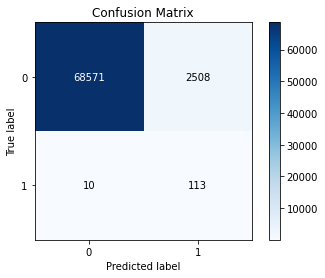

In [18]:
import scikitplot as skplt
# Exibir o relatório de classificação
print(classification_report(y_test, y_predict))

# Imprimir o score AUC
print("ROC AUC score: {:.4f}\n".format(roc_auc_score(y_test, y_predict)))

# Plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_predict);

Analisando a matriz de confusão, podemos concluir:


*   Temos 10 transações classificadas como falsos negativos.
*   2508 transações como falso positivo e 113 transações classificadas como verdadeiros negativos.
*   O *AUC* desse módelo foi de 94%, o que significa que o algoritmo de Regressão Logistica deve um bom desempenho.






###Árvores de Decisão (Decision Tree)

Para um melhor entendimento desse algoritmo de aprendizado de máquina, irei da uma breve explicação de como funciona.

A árvore de decisão é construida através do processo de indução, esse algoritmo tem como propósito fazer diversas divisões dos dados em subconjuntos, de modo que os subconjuntos vão ficando cada vez mais puros. Para selecionar quais atributos serão utilizados na composição da árvore, é considerado o grau de entropia de um nó e a informação ganha após um split. Para mais informações [Clique aqui](https://cienciaenegocios.com/o-que-e-arvore-de-decisao-decision-tree-linguagem-r/).



In [19]:
# Instanciar e treinar o modelo de Decision Tree
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=0)
model_tree.fit(X_rus, y_rus)

y_pred_tree = model_tree.predict(X_test)

###Avaliando o modelo

O processo para avaliar esse modelo é exatamente igual ao anterior.

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.87      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.97      0.99     71202

ROC AUC Score: 0.9223



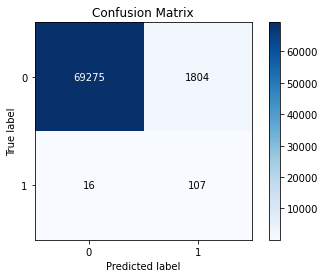

In [20]:
# Exibir o relatório de classificação
print(classification_report(y_test, y_pred_tree))

# Imprimir o score AUC
print("ROC AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

# Plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree);

Através da matriz de confusão, podemos extrair algumas informações:


*   É constatado que há 16 transações classificadas como falsos negativos, houve um pequeno aumento comparado com o modelo anterior.
*   Houve 1804 transações como falso positivo e 107 transações classificadas como verdadeiros negativos.
*   Esse modelo teve o *AUC* de 92%, 


#Conclusão

Podemos notar que nesse projeto, não teve valores ausentes e não foi necessário fazer uma limpeza dos dados. Entretanto, tivemos que lidar com o desbalanceamento e a Transformação PCA assim demandando um trabalho considerável.

Os modelos utilizados obtiveram bom desempenho na detecção de fraude em cartão de crédito, tento ambos com *AUC* superior a 90%.

No entando, o modelo de Regressão Logística apresentou um resultado melhor, tento o *AUC* de 94%.

Obviamente, apesar do bom resultado final, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.